In [ ]:
Q 1) What is K-Nearest Neighbors (KNN) and how does it work?
>> K-Nearest Neighbors (KNN) is a simple, supervised machine learning algorithm used for classification and regression by finding the \(k\) closest,
   labeled data points to a new, unlabeled data point. 
   It works by measuring distances (e.g., Euclidean) between data points to predict the class ofrvalue based on the majority vote or average of those
   \(k\) neighbors

In [ ]:
Q 2) What is the difference between KNN Classification and KNN Regression?
>> classification predicts discrete categories using majority voting, while regression predicts continuous numerical values by calculating the mean
   or median of the neighbors

In [ ]:
Q 3) What is the role of the distance metric in KNN?
>> to quantify the similarity or dissimilarity between data points.

In [ ]:
Q 4) What is the Curse of Dimensionality in KNN?
>>  the degradation of model performance as the number of features (dimensions) increases, caused by data sparsity and the inability to define "nearest"
    neighbors

In [ ]:
Q 5) How can we choose the best value of K in KNN?
>> testing a range of odd integers and selecting the one that minimizes validation error.

In [ ]:
Q 6) What are KD Tree and Ball Tree in KNN?
>> spatial indexing data structures used in the K-Nearest Neighbors (KNN) algorithm to optimize the nearest neighbor search

In [ ]:
Q 7) When should you use KD Tree vs. Ball Tree?
>>  KD Tree for low-dimensional, uniform, static data and a Ball Tree for high-dimensional, non-uniform data or when using non-Euclidean
    distance metrics. 

In [ ]:
Q 8) What are the disadvantages of KNN?
>> slow prediction speeds, high memory consumption for storing training data, high sensitivity to outliers and noisy data, and a mandatory need for
   feature scaling to ensure accuracy. 

In [ ]:
Q 9) How does feature scaling affect KNN?
>> Without scaling, features with larger magnitudes dominate the distance calculation, causing the model to ignore smaller-scale features, 
   leading to biased results and poor accuracy. 

In [ ]:
Q 10) What is PCA (Principal Component Analysis)?
>> a statistical method for dimensionality reduction, simplifying complex, high-dimensional data by transforming it into fewer,
   new variables called principal components, 

In [ ]:
Q 11) How does PCA work?
>> by transforming high-dimensional data into a smaller set of uncorrelated variables called principal components, which capture the most variance 
   (information) in the original dataset, reducing complexity while minimizing information loss for easier visualization and analysis.

In [ ]:
Q 12) What is the geometric intuition behind PCA?
>>  acts as a rotation of the coordinate system, identifying new orthogonal axes—Principal Components—that align with the directions of maximum variance
    in a data cloud

In [ ]:
Q 13) What are Eigenvalues and Eigenvectors in PCA?
>> eigenvectors define the new axes (Principal Components) of maximum variance in the data, while their corresponding eigenvalues quantify the amount
   of variance (information) captured along each of those axes

In [ ]:
Q 14) What is the difference between Feature Selection and Feature Extraction?
>> Feature selection chooses a subset of original features, keeping them interpretable;
   > feature extraction transforms original features into new, often fewer, combined features, potentially losing interpretability but creating a more 
     informative representation
   > both reducing dimensionality for better model performance.

In [ ]:
Q 15) How do you decide the number of components to keep in PCA?
>> balancing dimensionality reduction (keeping few components) with information retention (capturing most variance)

In [ ]:
Q 16) Can PCA be used for classification
>> PCA) is not a classification technique itself

In [ ]:
Q 17) What are the limitations of PCA?
>> information loss during dimensionality reduction, difficulty interpreting the new principal components (which lose original feature meaning)

In [ ]:
Q 18) How do KNN and PCA complement each other
>> by forming a hybrid workflow (PCA-KNN)

In [ ]:
Q 19) How does KNN handle missing values in a dataset
>>  Data points with missing values must be addressed before using standard KNN. 

In [ ]:
Q 20) What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
>> PCA is an unsupervised method that maximizes overall data variance to find principal components.
   LDA is a supervised method that maximizes class separability by maximizing between-class variance and minimizing within-class variance

# PRACTICAL

In [ ]:
Q 21) Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


In [ ]:
Q 22) Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
y = y.ravel() 

print(f"Generated synthetic data with X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


k_value = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k_value)

print(f"Initialized KNN Regressor with k={k_value}")

knn_regressor.fit(X_train, y_train)

print("Model training complete.")

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print(f"\nModel Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Generated synthetic data with X shape: (200, 1), y shape: (200,)
Training data shape: (160, 1), Testing data shape: (40, 1)
Initialized KNN Regressor with k=5
Model training complete.

Model Evaluation Results:
Mean Squared Error (MSE): 658.8394
Root Mean Squared Error (RMSE): 25.6679


In [ ]:
Q 23) Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)


knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Euclidean Accuracy (p=2): {accuracy_euclidean:.4f}")
print(f"Manhattan Accuracy (p=1): {accuracy_manhattan:.4f}")

Euclidean Accuracy (p=2): 0.9111
Manhattan Accuracy (p=1): 0.9111


In [ ]:
Q 25) Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"Accuracy with Unscaled Data: {accuracy_unscaled:.4f}")

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with Scaled Data:   {accuracy_scaled:.4f}")

print("\nComparison:")
if accuracy_scaled > accuracy_unscaled:
    print("Feature scaling improved the model's accuracy.")
elif accuracy_scaled < accuracy_unscaled:
    print("Unscaled data performed better (unlikely for KNN).")
else:
    print("Accuracy scores are identical.")

Accuracy with Unscaled Data: 1.0000
Accuracy with Scaled Data:   1.0000

Comparison:
Accuracy scores are identical.


In [ ]:
Q 26) Train a PCA model on synthetic data and print the explained variance ratio for each component

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=5, centers=3, random_state=42)

pca = PCA(n_components=None) 
pca.fit(X)

print("Explained variance ratio by component:")
print(pca.explained_variance_ratio_)

print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio by component:
[0.80971148 0.16730513 0.00957141 0.0075384  0.00587358]

Cumulative explained variance:
[0.80971148 0.97701661 0.98658802 0.99412642 1.        ]


In [ ]:
Q 27) Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca) * 100


pca = PCA(n_components=0.95) 


pipeline_pca_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline_pca_knn.fit(X_train, y_train) 
y_pred_pca = pipeline_pca_knn.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca) * 100

print(f"Accuracy of KNN without PCA: {accuracy_no_pca:.2f}%")
print(f"Accuracy of KNN with PCA: {accuracy_pca:.2f}%")
print(f"Number of components used in PCA: {pipeline_pca_knn['pca'].n_components_}")

Accuracy of KNN without PCA: 100.00%
Accuracy of KNN with PCA: 95.56%
Number of components used in PCA: 2


In [ ]:
Q 28) Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load Data
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 
    'weights': ['uniform', 'distance'],                 
    'p': [1, 2]                                         
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=1
)

print("Performing Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

best_params = grid_search.best_params_
best_score = grid_search.best_score_ 

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score (Accuracy): {best_score:.4f}")

best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"\nTest Set Accuracy with Best Model: {test_accuracy:.4f}")


Performing Grid Search...
Grid Search complete.

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Cross-Validation Score (Accuracy): 0.9810

Test Set Accuracy with Best Model: 0.9556


In [ ]:
Q 29) Train a KNN Classifier and check the number of misclassified samples

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


misclassified_samples = np.sum(y_pred != y_test)
total_samples = len(y_test)

print(f"Total number of test samples: {total_samples}")
print(f"Number of misclassified samples: {misclassified_samples}")

Total number of test samples: 45
Number of misclassified samples: 0


In [ ]:
Q 30) Train a PCA model and visualize the cumulative explained variance

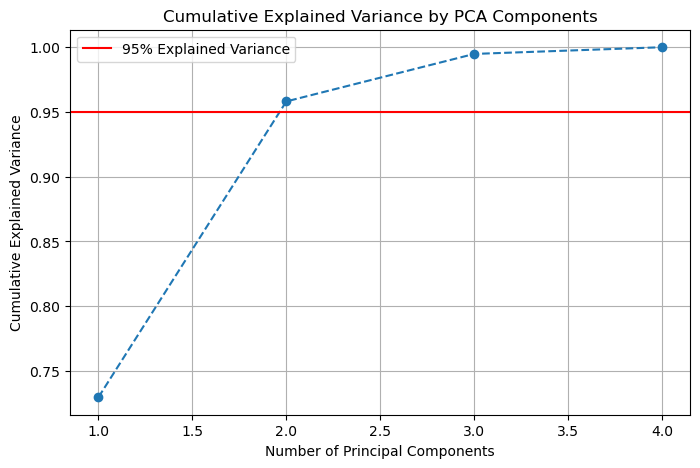

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()
X = StandardScaler().fit_transform(data.data)

pca = PCA()
pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.show()

In [ ]:
Q 31) Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare 
accuracy

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_uni = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uni.fit(X_train, y_train)
acc_uni = accuracy_score(y_test, knn_uni.predict(X_test))

knn_dist = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_dist.fit(X_train, y_train)
acc_dist = accuracy_score(y_test, knn_dist.predict(X_test))

print(f"Uniform Accuracy: {acc_uni:.4f}")
print(f"Distance Accuracy: {acc_dist:.4f}")

Uniform Accuracy: 1.0000
Distance Accuracy: 1.0000


In [ ]:
Q 32) Train a KNN Regressor and analyze the effect of different K values on performance

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=5000, n_features=10, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5, 7, 10, 15, 20, 30, 50, 100]
mse_results = []
r2_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_results.append(mse)
    r2_results.append(r2)
    print(f"K={k:3d} | MSE: {mse:.4f} | R2: {r2:.4f}")

K=  1 | MSE: 8499.4442 | R2: 0.7127
K=  3 | MSE: 5248.6908 | R2: 0.8226
K=  5 | MSE: 4601.2799 | R2: 0.8445
K=  7 | MSE: 4301.2628 | R2: 0.8546
K= 10 | MSE: 4313.0683 | R2: 0.8542
K= 15 | MSE: 4398.1677 | R2: 0.8513
K= 20 | MSE: 4567.9504 | R2: 0.8456
K= 30 | MSE: 4873.8375 | R2: 0.8353
K= 50 | MSE: 5539.3429 | R2: 0.8128
K=100 | MSE: 6748.1782 | R2: 0.7719


In [ ]:
Q 33) Implement KNN Imputation for handling missing values in a dataset

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

def implement_knn_imputation(df, n_neighbors=5):
    """
    Implements KNN imputation for handling missing values in a pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame with missing values (NaNs).
        n_neighbors (int): The number of neighbors to use for imputation.

    Returns:
        pd.DataFrame: The DataFrame with missing values imputed.
    """
    
    
    imputer = KNNImputer(n_neighbors=n_neighbors)

    
    imputed_data_array = imputer.fit_transform(df)
    
    df_imputed = pd.DataFrame(
        imputed_data_array, 
        columns=df.columns, 
        index=df.index
    )
    
    return df_imputed

data = {
    'Feature_A': [1.0, 2.0, np.nan, 4.0, 5.0, 1.0],
    'Feature_B': [10.0, np.nan, 30.0, 40.0, 50.0, 15.0],
    'Feature_C': [100.0, 200.0, 300.0, np.nan, 500.0, 120.0]
}
df_original = pd.DataFrame(data)

print("--- Original DataFrame ---")
print(df_original.info())
print(df_original)

df_imputed_knn = implement_knn_imputation(df_original, n_neighbors=3)

print("\n--- Imputed DataFrame (n_neighbors=3) ---")
print(df_imputed_knn.info())
print(df_imputed_knn)

--- Original DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_A  5 non-null      float64
 1   Feature_B  5 non-null      float64
 2   Feature_C  5 non-null      float64
dtypes: float64(3)
memory usage: 276.0 bytes
None
   Feature_A  Feature_B  Feature_C
0        1.0       10.0      100.0
1        2.0        NaN      200.0
2        NaN       30.0      300.0
3        4.0       40.0        NaN
4        5.0       50.0      500.0
5        1.0       15.0      120.0

--- Imputed DataFrame (n_neighbors=3) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_A  6 non-null      float64
 1   Feature_B  6 non-null      float64
 2   Feature_C  6 non-null      float64
dtypes: float64(3)
memory usage: 27

In [ ]:
Q 34) Train a PCA model and visualize the data projection onto the first two principal components

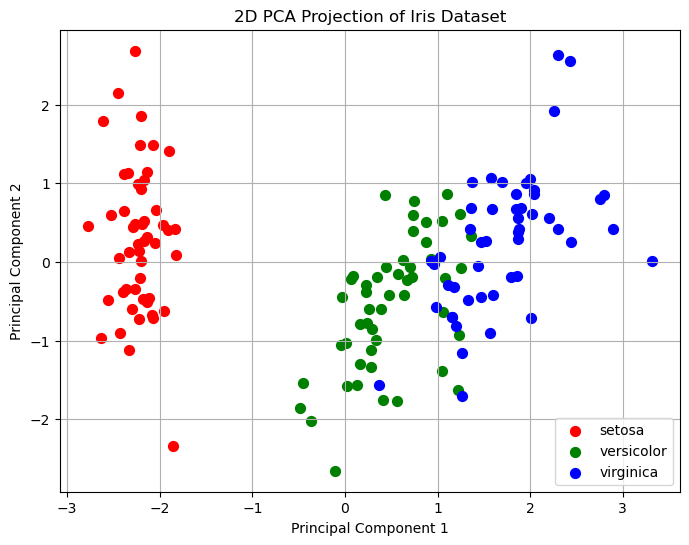

Explained variance ratio: [0.72962445 0.22850762]


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target
X_std = StandardScaler().fit_transform(X) 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['target'])], axis = 1)

plt.figure(figsize=(8,6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
                finalDf.loc[indicesToKeep, 'Principal Component 2'],
                c = color, s = 50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Iris Dataset')
plt.legend(data.target_names)
plt.grid()
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [ ]:
Q 35) Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [14]:
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

start_time_kd = time.time()
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree') 
knn_kd.fit(X_train, y_train)
predictions_kd = knn_kd.predict(X_test)
end_time_kd = time.time()

accuracy_kd = accuracy_score(y_test, predictions_kd)
time_kd = end_time_kd - start_time_kd

start_time_ball = time.time()
knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree') 
knn_ball.fit(X_train, y_train)
predictions_ball = knn_ball.predict(X_test)
end_time_ball = time.time()

accuracy_ball = accuracy_score(y_test, predictions_ball)
time_ball = end_time_ball - start_time_ball

print("--- KNN Classifier Performance Comparison ---")
print(f"Dataset Dimensionality: {X.shape[1]} features")

print("\nKD Tree Results:")
print(f"Accuracy: {accuracy_kd:.4f}")
print(f"Training/Prediction Time: {time_kd:.4f} seconds")

print("\nBall Tree Results:")
print(f"Accuracy: {accuracy_ball:.4f}")
print(f"Training/Prediction Time: {time_ball:.4f} seconds")

--- KNN Classifier Performance Comparison ---
Dataset Dimensionality: 4 features

KD Tree Results:
Accuracy: 1.0000
Training/Prediction Time: 0.0104 seconds

Ball Tree Results:
Accuracy: 1.0000
Training/Prediction Time: 0.0090 seconds
